In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   


In [ ]:
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


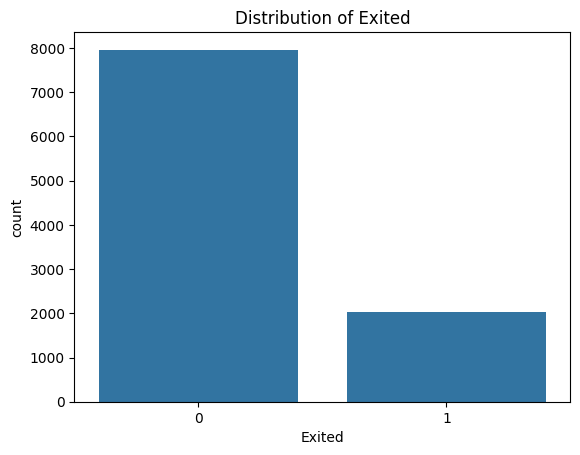

In [ ]:
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

In [ ]:
# Select only numeric columns
data = data.select_dtypes(include=["number"])

# Print the first five rows of the data
data.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
non_numeric_cols = data.select_dtypes(include=["object"]).columns
if len(non_numeric_cols) > 0:
  raise ValueError("DataFrame contains non-numeric columns:", non_numeric_cols)

In [ ]:
# Convert non-numeric columns to numeric values (if possible)
for col in non_numeric_cols:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        pass

# Print the first five rows of the data
data.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

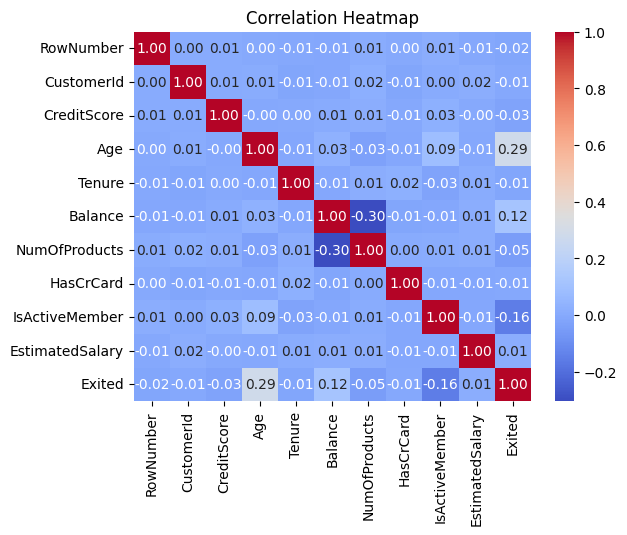

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.tail()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0

In [ ]:
data.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
A = data[selected_features]
B = data['Exited']

In [ ]:
A = pd.get_dummies(A, columns=['HasCrCard', 'IsActiveMember'], drop_first=True)

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(A_train, B_train)
B_pred_logreg = logreg_model.predict(A_test)

In [ ]:
accuracy_logreg = accuracy_score(B_test, B_pred_logreg)
conf_matrix_logreg = confusion_matrix(B_test, B_pred_logreg)
classification_rep_logreg = classification_report(B_test, B_pred_logreg)

In [ ]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("Classification Report:")
print(classification_rep_logreg)


Logistic Regression Results:
Accuracy: 0.81
Confusion Matrix:
[[1559   48]
 [ 333   60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.56      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.77      0.81      0.76      2000



In [ ]:
param_grid = {
    'n_estimators': [70, 130, 210],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(A_train, B_train)
best_rf_model = grid_search.best_estimator_
B_pred_rf = best_rf_model.predict(A_test)

In [ ]:
accuracy_rf = accuracy_score(B_test, B_pred_rf)
conf_matrix_rf = confusion_matrix(B_test, B_pred_rf)
classification_rep_rf = classification_report(B_test, B_pred_rf)

print("\nRandom Forest Results:")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(classification_rep_rf)


Random Forest Results:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.86
Confusion Matrix:
[[1558   49]
 [ 233  160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



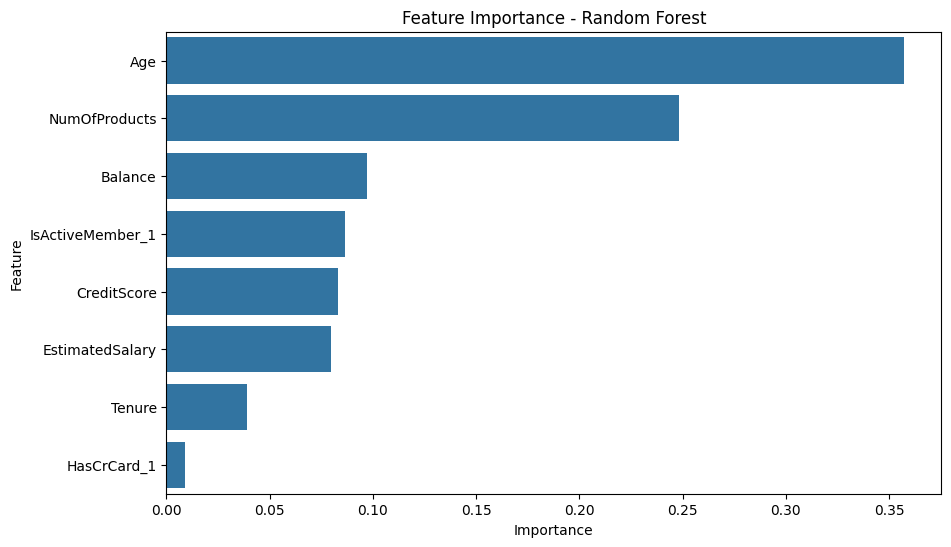

In [ ]:
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': A.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()